In [60]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.integrate
import matplotlib.pyplot as plt

In [61]:
def u(x):
    return 1 / (1+50*(0.5 * x)**2)
    #return np.sin(2*np.pi*x)

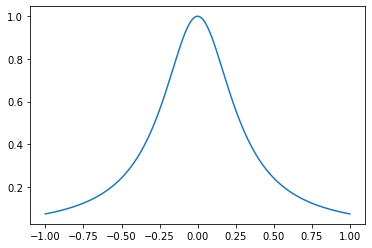

In [62]:
x = np.linspace(-1, 1, 1025)

_ = plt.plot(x, u(x))

In [63]:
n = 10

#V = [lambda x, i: x**i for i in range(n)]
def V(x, i):
    return x**i

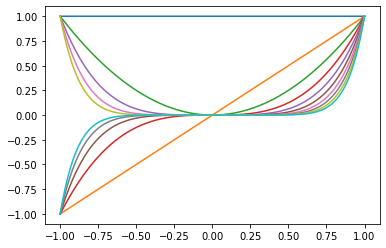

In [64]:
for i in range(n):
    _ = plt.plot(x, V(x, i))

In [65]:
M = np.array([[scipy.integrate.quad(lambda x: V(x, i)*V(x, j), 0, 1)[0] for i in range(n)] for j in range(n)])
U = np.array([scipy.integrate.quad(lambda x: V(x, i)*u(x), 0, 1)[0] for i in range(n)]).T

In [66]:
#M.dot(U)
M

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
        0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667,
        0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714,
        0.125     , 0.11111111, 0.1       , 0.09090909, 0.08333333],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ,
        0.11111111, 0.1       , 0.09090909, 0.08333333, 0.07692308],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111,
        0.1       , 0.09090909, 0.08333333, 0.07692308, 0.07142857],
       [0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ,
        0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667],
       [0.14285714, 0.125     , 0.11111111, 0.1       , 0.09090909,
        0.08333333, 0.07692308, 0.07142857, 0.06666667, 0.0625    ],
       [0.125     , 0.11111111, 0.1      

In [67]:
P = sp.linalg.solve(M, U)

In [68]:
Vx = np.array([V(x, i) for i in range(n)]).T

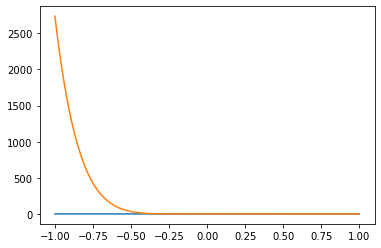

In [69]:
plt.plot(x, u(x))
plt.plot(x, Vx.dot(P))

In [70]:
def legendre_basic(x, i):
    if not i:
        return x * 0 + 1
    elif i == 1:
        return x
    return ((2*i-1) * x * legendre_basic(x, i-1) - (i-1) * legendre_basic(x, i - 2)) / i

def legendre(x, i, a=-1, b=1):
    return legendre_basic((2*x-a-b)/(b-a), i)

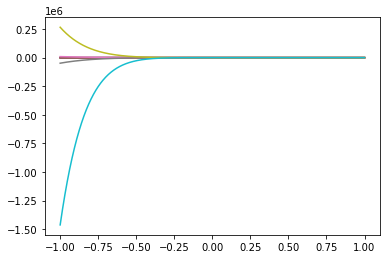

In [71]:
n = 10
_ = [plt.plot(x, legendre(x, i, 0, 1)) for i in range(n)]

In [72]:
M = np.array([[scipy.integrate.quad(lambda x: legendre(x, i)*legendre(x, j), -1, 1)[0] for i in range(n)] for j in range(n)])
U = np.array([scipy.integrate.quad(lambda x: legendre(x, i)*u(x), -1, 1)[0] for i in range(n)]).T
P = sp.linalg.solve(M, U)

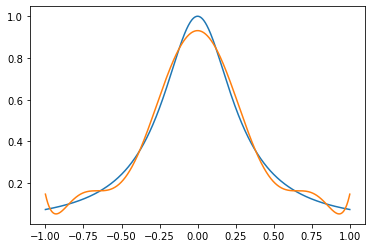

In [73]:
Vl = np.array([legendre(x, i) for i in range(n)]).T
#legendre is not orthonormal; it means that P gets already scaled
plt.plot(x, u(x))
plt.plot(x, Vl.dot(P))

In [74]:
def legendre_orthonormal(x, i):
    Pinorm = np.sqrt(scipy.integrate.quad(lambda x: legendre(x, i)**2, -1, 1)[0])
    return legendre(x, i)/Pinorm

In [75]:
M = np.array([[scipy.integrate.quad(lambda x: legendre_orthonormal(x, i)*legendre_orthonormal(x, j), -1, 1)[0] for i in range(n)] for j in range(n)])

In [76]:
q, w = np.polynomial.legendre.leggauss(5)

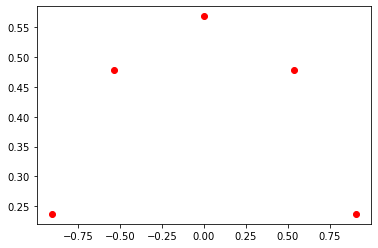

In [77]:
plt.plot(q, w, "ro")

In [107]:
V = np.array([[(x-qi)/(qj-qi) for i, qi in enumerate(q) if i != j] for j, qj in enumerate(q)]).T
V = np.prod(V, axis=1)

x

array([-1.        , -0.99804688, -0.99609375, ...,  0.99609375,
        0.99804688,  1.        ])

In [108]:
def lagrange(i, q, x):
    a = np.ones(len(x))
    for j, qj in enumerate(q):
        if j != i:
            a *= (x-qj)/(q[i] - qj)
    return a

In [109]:
W = np.array([scipy.integrate.quad(lambda x: lagrange(i, q, x), -1, 1)[0] for i in range(len(q))])

TypeError: object of type 'float' has no len()

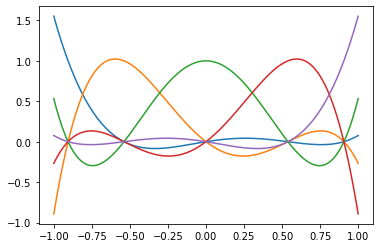

In [102]:
plt.plot(x, V)

In [103]:
W

array([0., 0., 0., 0., 0.])